In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read in the CMPD data
crimeDF = pd.read_csv('CMPD_Incidents.csv', low_memory=False)
crimeDF.head()

,YEAR,INCIDENT_REPORT_ID,LOCATION,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,CMPD_PATROL_DIVISION,NPA,...,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
0,2023,20231022-2159-03,11000 NORTHLAKE LANDING DR,28216,1446960.0,592756.0,35.364506,-80.855140,North,72,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Private Residence,Open,Open,NaN,90Z,All Other Offenses
1,2023,20231022-2151-00,5800 MONROE RD,28212,1472824.0,527355.0,35.186132,-80.764500,Independence,52,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Hotel/Motel,Open,Open,NaN,23H,All Other Thefts
2,2023,20231022-2131-00,2400 N TRYON ST,28206,1456970.0,549523.0,35.246247,-80.818913,Metro,157,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Other - Commercial Place,Open,Open,NaN,23H,All Other Thefts
3,2023,20231022-2006-03,4400 SHARON RD,28211,1453419.0,514991.0,35.151200,-80.828674,Providence,358,...,2023/10/22 00:00:00+00,Location of occurrence,Parking Lot,Retail,Shopping Mall,Open,Open,NaN,23G,Theft of Motor Vehicle Parts from Vehicle
4,2023,20231022-1958-01,4600 WATERFORD KNOLL DR,NaN,1446684.0,493480.0,35.091762,-80.849861,South,303,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Apartment/Duplex Private Res,Open,Open,NaN,802,Sudden/Natural Death Investigation


In [3]:
# Unique IDs from the 'INCIDENT_REPORT_ID' column
unique_incident_report_ids = crimeDF['INCIDENT_REPORT_ID'].unique()
len(unique_incident_report_ids)

624990

In [4]:
addressDescription = crimeDF['ADDRESS_DESCRIPTION'].unique()
len(addressDescription)

3

In [13]:
precinctCount = crimeDF.groupby(['CMPD_PATROL_DIVISION', 'YEAR'])['INCIDENT_REPORT_ID'].count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(precinctCount)


CMPD_PATROL_DIVISION  YEAR
Airport               2017      986
                      2018     1156
                      2019     1214
                      2020     1095
                      2021     1562
                      2022     1641
                      2023     1431
Central               2017     6101
                      2018     6015
                      2019     6146
                      2020     5318
                      2021     6259
                      2022     6976
                      2023     5741
Davidson              2017       13
                      2018        4
                      2019        6
                      2020        5
                      2021        4
                      2022        7
                      2023        6
Eastway               2017     5886
                      2018     5731
                      2019     6339
                      2020     5461
                      2021     5524
                      2022     5522
 

TypeError: 'value' must be an instance of str or bytes, not a tuple

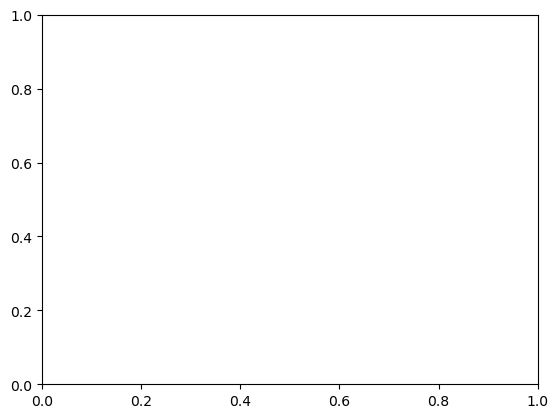

In [14]:
plt.plot(precinctCount)
plt.show()